# Lab 2 : Decision Trees, Forests and Logistic Regression

---


Total Points: **50**

Tentative Weightage : **5%**

Submission Deadline :  **5th March 2021, 23:59 hours**

---



General Instructions:

---



1. You have to do this lab individually
2. You may use **sklearn, seaborn, matplotlib, pandas, Tensorflow 2.x or PyTorch**
3. All the code should be submitted in the form of a single Jupyter notebook itself.
4. Points for each sub-section are mentioned in the appropriate question.
5. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/)
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
7. **Code Readability** is very important. Modularize your code by making use of classes, functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as necessary.
8. You are expected to submit your **inferences** (preferably in a text block) and not just an error free code.
9. Students are expected to follow the **honor code** of the class.
10. In case of any queries regarding Lab 2, please mail 2017csz0005@iitrpr.ac.in


# Dataset

###About the Dataset
A malware classifier dataset built with header fields’ values of portable executable files. You can read more about the dataset [here](https://www.kaggle.com/saurabhshahane/classification-of-malwares) 


###Tasks on Dataset Exploration


---


Total for this subsection : **5 points**


---


1. Download and extract the 'Malwares' dataset from this [link](https://www.kaggle.com/saurabhshahane/classification-of-malwares) 
2. Take a look at the downloaded dataset and explore the various columns/headers present in the dataset. **Note: You are to use the *raw* file throughout this assignment and not the intergrated* one**.   
3. Load the dataset using the pandas library. You can refer to the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/io.html). (**1 point**)
4. Report the total number of samples and the total number of columns in the dataset. (**1 point**)
5. Evaluate the dataset and drop data which hash 'NA' values. Now report the total number of samples and the total number of columns in the dataset. (**1 point**)
6. Plot a bar chart showing the number of samples with the malware present and not present. (**1 point**)
7. Split the dataset into Train and Test sets in a 80:20 ratio. (**1 point**)

In [93]:
# Perform the necessary imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [94]:
# To access files stored in Google Drive, following block import is used
# If using on a local system, please comment the lines below in this code block

# from google.colab import drive
# drive.mount('/content/MyDrive', force_remount = True)

In [95]:
# Please provide the path where ClaMP_Raw-5184.csv has been stored 
# csv_file_path = """

I am using local system for storing dataset.
So user need to store ClaMP-Raw-5184.csv file in the Files with the Notebook.

In [96]:
# Load the data from csv file into a data frame (1 point)
# Please insert your code here
# data = pd.read_csv(csv_file_path)

# downloaded = drive.CreateFile({'id': '1AKSiXCxyRTIYb8CcazK9GW92INWH76j9'}) 
# downloaded.GetContentFile('ClaMP_Raw-5184.csv')  

data = pd.read_csv('ClaMP_Raw-5184.csv')


In [97]:
# Print the number of instances and attributes in the loaded data frame (1 point)
# Please insert your code here
# print(data)
print("Number of Columns/Attributes ",data.columns.size) #shows coulmns(ie attributes) Heading
print("Number of Rows/Instances ",len(data.index)) #Attribute Values

Number of Columns/Attributes  56
Number of Rows/Instances  5184


In [98]:
# Drop the columns with NaN values (0.5 points)
# Please insert your code here
df = data.dropna(axis=1, how='any')
print(df)

      e_magic  e_cblp  e_cp  ...  LoaderFlags  NumberOfRvaAndSizes  class
0       23117     144     3  ...            0                   16      0
1       23117     144     3  ...            0                   16      0
2       23117     144     3  ...            0                   16      0
3       23117     144     3  ...            0                   16      0
4       23117     144     3  ...            0                   16      0
...       ...     ...   ...  ...          ...                  ...    ...
5179    23117     144     3  ...            0                   16      1
5180    23117      80     2  ...            0                   16      1
5181    23117     144     3  ...            0                   16      1
5182    23117     144     3  ...            0                   16      1
5183    23117     144     3  ...            0                   16      1

[5184 rows x 54 columns]


In [99]:
# Print the number of instances and attributes in the loaded data frame after removal of NaN columns (0.5 points)
# Please insert your code here
print("Number of Columns/Attributes ",df.columns.size) #shows coulmns(ie attributes) Heading
print("Number of Rows/Instances ",len(df.index)) #Attribute Values
# print(df.columns)

Number of Columns/Attributes  54
Number of Rows/Instances  5184


2 Columns got Droped that had NaN values. This was done using dropna function of Pandas library.

Number of Malware : 2501
Number of Not-Malware : 2683




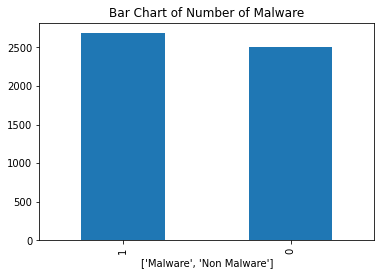

In [100]:
# Plot a bar chart showing the number of samples with the malware present and not present (1 point)
# Please insert your code here
feat = ["Malware", "Non Malware"]
fig, ax = plt.subplots()
df['class'].value_counts().plot(ax=ax, kind='bar')
plt.title("Bar Chart of Number of Malware")
plt.xlabel(feat)
tmp = df["class"].value_counts()
print("Number of Malware :", tmp[0])
print("Number of Not-Malware :", tmp[1])
print("\n")

In [101]:
#Split the dataset into Train and Test sets in a 80:20 ratio (1 point)
# Please insert your code here
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
trainx, testx, trainy, testy = train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=True)

Spiliting data set using Sklearn library in 80:20(train:test) partion.

# Visualizing a Decision Tree


---
Total for this subsection : **3 points**


---



Learn a decision tree classifier which accomodates at least 1000 samples per leaf node based on the train set. Note that this constraint on number of samples per leaf node is set so that the learned tree can be visualized. The tree learned may not be an optimal. Visualize the decision tree learned with such a constraint.

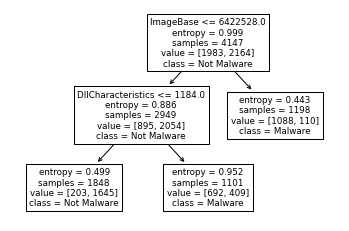

In [102]:
# Please insert your code here
# Step 1: Create a decision tree classifier with atleast 1000 samples per leaf node (1 point)
clasifier = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_leaf=1000)
# Step 2 : Learn the decision tree using the train set (1 point)
clasifier.fit(trainx, trainy)
# Step 3 : Plot the decision tree learned (1 point)
fn = df.columns
cn = ["Malware", "Not Malware"]
tree.plot_tree(clasifier, class_names=cn, feature_names=fn);

Decision Tree Classifier with Criterion of Entroy and best spliiter. As specified minimum samples per leaf is 1000. So Depth of Tree has Decreaes. If Dataset is of large size 

# Generating plots
Complete the following function that shall be reused to generate line plots in subsequent sections with approporiate labels in the legend and titles.

---
Total for this subsection : **2 points**

---





In [103]:
def generate_line_plots(xlist1, xlist2, ylist1, ylist2, legend1, legend2,given_title):
    """
    xlist1 : the list of values that form x axis in first plot
    ylist1 : the list of values that form y axis in first plot
    xlist2 : the list of values that form x axis in second plot
    ylist2 : the list of values that form y axis in second plot
    legend1 : label corresponding to first plot that will appear as its legend
    legend2 : label corresponding to second plot that will appear as its legend
    given_title : title for the plots
    """
    # Please feel free to add additional parameters to the function definition as necessary
    # But, provide description as given above to any additional parameter you add
    # Please insert your code here
    plt.plot(xlist1, ylist1, label=legend1)
    plt.plot(xlist2, ylist2, label=legend2)
    plt.title(given_title)
    plt.legend();

    

# Experimentation with various decision tree hyperparameters


---

You will be using the decision tree classifier defined in the sklearn package. You will be experimenting with various hyperparametrs that the package allows control over.

## Minimum number of samples per leaf


---


sklearn provides a flexibility to control the growth of the decision tree by making a split occur only when more than a certain number of samples fall under each leaf. In this section, **comment** on the effect of the various values of the minimum number of samples per leaf node on the train and test set accuracy inferred from their plot.

---
Total for this subsection : **5 points**

---





Train Accuracy with number of samples per leaf  50  : 94.88787074993972
Test Accuracy with number of samples per leaf  50  : 94.4069431051109
Train Accuracy with number of samples per leaf  100  : 93.10344827586206
Test Accuracy with number of samples per leaf  100  : 92.47830279652844
Train Accuracy with number of samples per leaf  200  : 88.738847359537
Test Accuracy with number of samples per leaf  200  : 88.33172613307619
Train Accuracy with number of samples per leaf  500  : 88.52182300458162
Test Accuracy with number of samples per leaf  500  : 89.19961427193829
Train Accuracy with number of samples per leaf  1000  : 82.58982396913432
Test Accuracy with number of samples per leaf  1000  : 81.4850530376085


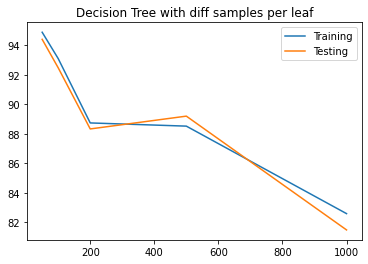

In [104]:
# Experiment with various number of leaf samples

num_samples = [50,100,200,500,1000]

# Please insert your code here

training = []
testing = []

for num in num_samples:
    # Step 1 : Create a decision tree classifier with minimum number of samples per leaf (1 point)
    clasifier = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_leaf=num)
    # Step 2 : Learn the decision tree using the train set (1 point)
    clasifier.fit(trainx, trainy)
    # Step 3 : Compute train accuracy in % (0.5 points)
    pred_x = clasifier.predict(trainx)
    print("Train Accuracy with number of samples per leaf ", num," :", 100*accuracy_score(trainy, pred_x))
    training.append(100*accuracy_score(trainy, pred_x))
    # Step 4 : Compute test accuracy in % (0.5 points)
    pred = clasifier.predict(testx)
    print("Test Accuracy with number of samples per leaf ", num," :", 100*accuracy_score(testy, pred))
    testing.append(100*accuracy_score(testy, pred))    

  # Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(num_samples, num_samples, training , testing, "Training", "Testing", "Decision Tree with diff samples per leaf")

### Comments on the effect of minimum number of samples per leaf node on accuracy (1 point)

---

Observation:-

1. Maximum accuracy observed in both Test and train data with lesser number of samples per leaf node.
2. when min number of samples per leaf is increased then accuracy started to decrease till it achives constant value for some value.
3. When Min number of samples per leaf is further increased, accuracies start reducing again further.

## Maximum number of leaf nodes in the tree


---


sklearn provides a flexibility to control the growth of the decision tree by constraining the maximum number of leaf nodes a tree can have. In this section, **comment** on the effect of the various values of the maximum number of  leaf nodes allowed on the train and test set accuracy inferred from a plot.

---
Total for this subsection : **5 points**

---

Train Accuracy with 2 number of leaves : 75.76561369664819
Test Accuracy with 2 number of leaves : 74.05978784956606
Train Accuracy with 3 number of leaves : 87.14733542319749
Test Accuracy with 3 number of leaves : 86.01735776277725
Train Accuracy with 4 number of leaves : 91.31902580178442
Test Accuracy with 4 number of leaves : 90.54966248794601
Train Accuracy with 5 number of leaves : 92.76585483482035
Test Accuracy with 5 number of leaves : 92.18900675024108
Train Accuracy with 6 number of leaves : 93.10344827586206
Test Accuracy with 6 number of leaves : 92.47830279652844
Train Accuracy with 7 number of leaves : 93.10344827586206
Test Accuracy with 7 number of leaves : 92.47830279652844
Train Accuracy with 8 number of leaves : 93.7062937062937
Test Accuracy with 8 number of leaves : 92.86403085824494
Train Accuracy with 9 number of leaves : 93.75452134072823
Test Accuracy with 9 number of leaves : 93.73191899710704
Train Accuracy with 10 number of leaves : 94.67084639498434
Test 

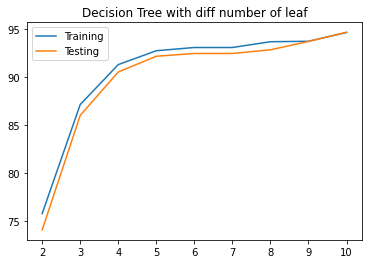

In [105]:
# Experiment with maximum number of leaf nodes

num_leaf_nodes = [i for i in range(2,11)]

# Please insert your code here
training = []
testing = []

for num in num_leaf_nodes:
    # Step 1 : Create a decision tree classifier with maximum number of leaf nodes (1 point)
    clasifier = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_leaf_nodes=num)
    # Step 2 : Learn the decision tree using the train set (1 point)
    clasifier.fit(trainx, trainy)
    # Step 3 : Compute train accuracy in % (0.5 points)
    pred_x = clasifier.predict(trainx)
    print("Train Accuracy with",num,"number of leaves :", 100*accuracy_score(trainy, pred_x))
    training.append(100*accuracy_score(trainy, pred_x))
    # Step 4 : Compute test accuracy in % (0.5 points)
    pred = clasifier.predict(testx)
    print("Test Accuracy with",num,"number of leaves :", 100*accuracy_score(testy, pred))
    testing.append(100*accuracy_score(testy, pred))   
 

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(num_leaf_nodes, num_leaf_nodes, training, testing, "Training", "Testing", "Decision Tree with diff number of leaf")

### Comments on the effect of maximum number of leaf nodes allowed on accuracy (1 point)

---

Observation:
1. When Number of leaf is fewer, it is observed that Accuracy at that pt is less in both train and test dataset.
2. As Number of leaf nodes is increased, accuracy increases both in testing and train dataset.
3. As number of leaf nodes is further increased, accuracies of both train and test dataset start attaining staturating, at till a extent both start growing more closer to each other.

## Maximum depth of the tree


---


sklearn provides a flexibility to control the growth of the decision tree by constraining the maximum depth a tree can grow. In this section, **comment** on the effect of the various values of the maximum tree depth allowed on the train and test set accuracy inferred from a plot.

---
Total for this subsection : **5 points**

---

Train Accuracy with tree depth 1 : 75.76561369664819
Test Accuracy with tree depth 1 : 74.05978784956606
Train Accuracy with tree depth 2 : 87.48492886423921
Test Accuracy with tree depth 2 : 86.3066538090646
Train Accuracy with tree depth 3 : 92.57294429708223
Test Accuracy with tree depth 3 : 91.80327868852459
Train Accuracy with tree depth 4 : 94.14034241620448
Test Accuracy with tree depth 4 : 93.34619093539055
Train Accuracy with tree depth 5 : 94.93609838437425
Test Accuracy with tree depth 5 : 94.21407907425265
Train Accuracy with tree depth 6 : 96.31058596575838
Test Accuracy with tree depth 6 : 95.66055930568949
Train Accuracy with tree depth 7 : 97.39570774053533
Test Accuracy with tree depth 7 : 96.81774349083896
Train Accuracy with tree depth 8 : 97.87798408488064
Test Accuracy with tree depth 8 : 97.20347155255546
Train Accuracy with tree depth 9 : 98.31203279479142
Test Accuracy with tree depth 9 : 96.91417550626808
Train Accuracy with tree depth 10 : 98.93899204244032
Te

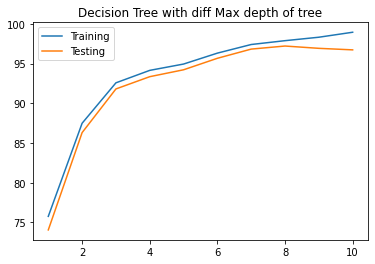

In [106]:
# Experiment with varied tree depths

tree_depths = [i for i in range(1,11)]

# Please insert your code here

training = []
testing = []

for depth in tree_depths:
    # Step 1 : Create a decision tree classifier with maximum tree depth (1 point)
    clasifier = tree.DecisionTreeClassifier(criterion='entropy', splitter='best',  max_depth=depth)

    # Step 2 : Learn the decision tree using the train set (1 point)
    clasifier.fit(trainx, trainy)

    # Step 3 : Compute train accuracy in % (0.5 points)
    pred_x = clasifier.predict(trainx)
    print("Train Accuracy with tree depth",depth,":", 100*accuracy_score(trainy, pred_x))
    training.append(100*accuracy_score(trainy, pred_x))
    # Step 4 : Compute test accuracy in % (0.5 points)
    pred = clasifier.predict(testx)
    print("Test Accuracy with tree depth",depth,":", 100*accuracy_score(testy, pred))  
    testing.append(100*accuracy_score(testy, pred))
      

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(tree_depths, tree_depths, training, testing, "Training", "Testing", "Decision Tree with diff Max depth of tree")

### Comments on the effect of maximum tree depth allowed on accuracy (1 point)

---

Observation:
1. When depth of the Decision tree is short, Accuracies in both test and train is observed low.
2. With increasing max allowed depth of decision tree, accuracy in both test and train dataset increases.
3. Further Accuracy of Train Dataset start attending staturatin with 100% accuracy
4. But with increasing Depth of Tree, when depth reach a certain level, accuracy in test data stat start decreasing.[Like Overfitting]

# Random Forest

---

In this section we will explore the power of ensembles via the Random Forest classifier. We will use the sklearn package's random forest ensemble and study the effect of its hyperparameters on the model performance.

## Instance Bagging


---



To build an ensemble of different trees, a subset of instances are chosen. sklearn provides the flexibility to control the maximum number of instances a subset can have. In this section,  **comment** on the effect of the various values of the maximum number of samples per subset on the train and test set accuracy inferred from their plot.


---
Total for this subsection : **5 points**

---





Train Accuracy with num_instances 100 : 95.12900892211236
Test Accuracy with num instances 100 : 94.69623915139826
Train Accuracy with num_instances 150 : 95.34603327706776
Test Accuracy with num instances 150 : 95.66055930568949
Train Accuracy with num_instances 200 : 96.28647214854111
Test Accuracy with num instances 200 : 96.23915139826423
Train Accuracy with num_instances 250 : 96.47938268627924
Test Accuracy with num instances 250 : 96.81774349083896
Train Accuracy with num_instances 300 : 96.59995177236557
Test Accuracy with num instances 300 : 96.23915139826423


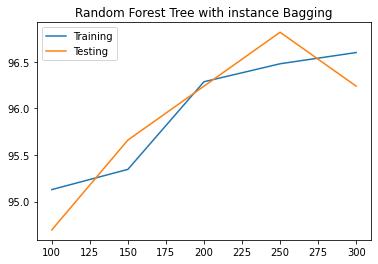

In [107]:
# Instance bagging

num_instances = [100,150,200,250,300]

# Please insert your code here

training = []
testing = []

for num in num_instances:
    # Step 1 : Create a decision tree classifier with maximum number of instances in a subset (1 point)
    rf = RandomForestClassifier(max_samples=num, criterion='entropy')

    # Step 2 : Learn the decision tree using the train set (1 point)
    rf.fit(trainx, trainy)

    # Step 3 : Compute train accuracy in % (0.5 points)
    pred_x = rf.predict(trainx)
    print("Train Accuracy with num_instances",num,":", 100*accuracy_score(trainy, pred_x))
    training.append(100*accuracy_score(trainy, pred_x))
    # Step 4 : Compute test accuracy in % (0.5 points)
    pred = rf.predict(testx)
    print("Test Accuracy with num instances",num,":", 100*accuracy_score(testy, pred)) 
    testing.append(100*accuracy_score(testy, pred)) 

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(num_instances, num_instances, training, testing, "Training", "Testing", "Random Forest Tree with instance Bagging")

### Comments on the effect of maximum number of instances allowed on accuracy (1 point)

---

Observation:
1. Accuracy in Random forest is observed high with respect to normal Decision tree classifier.
2. As Number of instances increases, accuracy in both Training and Testing dataset increases.
3. When Number of instances are few, Training Dataset accuracy is higher then of Test, but as number of instances increases, accuracy of test dataset start increasing rapidly nearly catching training dataset accuracy and may become nearly equal.

## Feature Bagging


---



To build an ensemble of different trees, a subset of features are chosen. sklearn provides the flexibility to control the maximum number of features a subset can have. In this section,  **comment** on the effect of the various values of the maximum number of features per subset on the train and test set accuracy inferred from their plot.


---
Total for this subsection : **5 points**

---

Train Accuracy with num_features 10 : 100.0
Test Accuracy with num_features 10 : 98.84281581485052
Train Accuracy with num_features 20 : 100.0
Test Accuracy with num_features 20 : 98.64995178399228
Train Accuracy with num_features 30 : 100.0
Test Accuracy with num_features 30 : 98.55351976856316
Train Accuracy with num_features 40 : 100.0
Test Accuracy with num_features 40 : 98.55351976856316
Train Accuracy with num_features 50 : 100.0
Test Accuracy with num_features 50 : 98.55351976856316


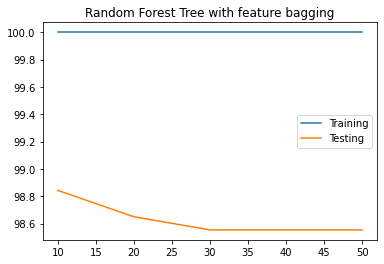

In [108]:
# Feature bagging

num_features = [10,20,30,40,50]

# Please insert your code here

training = []
testing = []

for num in num_features:
    # Step 1 : Create a decision tree classifier with maximum number of features in a subset (1 point)
    rf = RandomForestClassifier(max_features=num, criterion='entropy')
    # Step 2 : Learn the decision tree using the train set (1 point)
    rf.fit(trainx, trainy)
    # Step 3 : Compute train accuracy in % (0.5 points)
    pred_x = rf.predict(trainx)
    print("Train Accuracy with num_features",num,":", 100*accuracy_score(trainy, pred_x))
    training.append(100*accuracy_score(trainy, pred_x))
    # Step 4 : Compute test accuracy in % (0.5 points)
    pred = rf.predict(testx)
    print("Test Accuracy with num_features",num,":", 100*accuracy_score(testy, pred))  
    testing.append(100*accuracy_score(testy, pred)) 
      

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(num_features, num_features, training, testing, "Training", "Testing", "Random Forest Tree with feature bagging")

### Comments on the effect of maximum number of features allowed on accuracy (1 point) 

---

1. In random forest with feature, Accuracy of train dataset observed is exceptionally high ie near to 1.
2. Accuracy in test dataset is also observed to be high but less than train dataset. 
3. Testing Accuracy slightly decrease with increasing number of features allowed.
4. Improvement of Instance Bagging.

## Number of trees in the ensemble


---
In this section, we will explore the flexibilitity to control the number of decision trees that can be a part of the Random Forest ensemble. **Comment** on the effect of the various values of the maximum number of features per subset on the train and test set accuracy inferred from their plot.


---
Total for this subsection : **5 points**

---


Train Accuracy with number of tree 2 : 98.55317096696406
Test Accuracy with number of tree 2 : 95.66055930568949
Train Accuracy with number of tree 5 : 99.80708946226187
Test Accuracy with number of tree 5 : 98.16779170684667
Train Accuracy with number of tree 10 : 99.97588618278273
Test Accuracy with number of tree 10 : 98.07135969141754
Train Accuracy with number of tree 25 : 99.95177236556547
Test Accuracy with number of tree 25 : 98.45708775313405
Train Accuracy with number of tree 50 : 100.0
Test Accuracy with number of tree 50 : 98.45708775313405


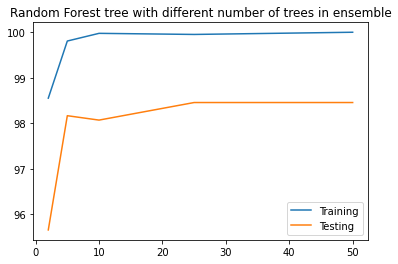

In [109]:
num_trees = [2,5,10,25,50]

# Please insert your code here

training = []
testing = []

for num in num_trees:
    # Step 1 : Create a decision tree classifier with the given number of trees in an ensemble (1 point)
    rf = RandomForestClassifier(n_estimators=num, criterion='entropy')
    # Step 2 : Learn the decision tree using the train set (1 point)
    rf.fit(trainx, trainy)
    # Step 3 : Compute train accuracy in % (0.5 points)
    pred_x = rf.predict(trainx)
    print("Train Accuracy with number of tree",num,":", 100*accuracy_score(trainy, pred_x))
    training.append(100*accuracy_score(trainy, pred_x))
    # Step 4 : Compute test accuracy in % (0.5 points)
    pred = rf.predict(testx)
    print("Test Accuracy with number of tree",num,":", 100*accuracy_score(testy, pred))  
    testing.append(100*accuracy_score(testy, pred)) 

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(num_trees, num_trees, training, testing, "Training", "Testing", "Random Forest tree with different number of trees in ensemble")

### Comments on the effect of maximum number of trees allowed on accuracy (1 point) 

---

Observation:
1. Train dataset accuracy is near to 1 when high number of tree are allowed.
2. As number of tree allowed increases, accuracy of both train and test datast increases.
3. Overfitting generally is not observed.


# Logistic Regression

---

In this section we will apply logistic regression to classify whether malware is present or not. We will experiment with a few hyperparameters that can be flexibly tuned in the sklearn package.

## Effect of regulaization


---
Points for this subsection : **5 points**


---

In the course, we have studied two types of regularization based on the norm applied, namely L1 and L2 regularization. **Comment** on the effect of regularization applied on the accuracy based on suitable plots.



Train Accuracy with regularization type none : 74.41523993248131
Test Accuracy with regularization type none : 73.8669238187078
Train Accuracy with regularization type l1 : 74.41523993248131
Test Accuracy with regularization type l1 : 73.8669238187078
Train Accuracy with regularization type l2 : 74.41523993248131
Test Accuracy with regularization type l2 : 73.8669238187078


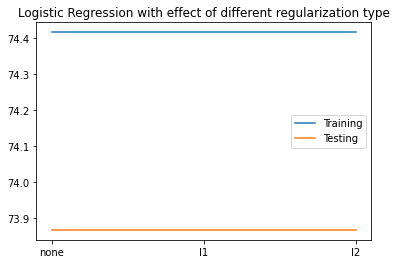

In [110]:
regularization_types = ['none','l1','l2']

# Please insert your code here
training = []
testing = []

for reg_type in regularization_types:
    # Step 1 : Create a logistic regression classifier with the given regularization type (1 point)
    lr = LogisticRegression(penalty=reg_type, solver='saga', max_iter=10000)
    # Step 2 : Learn the decision tree using the train set (1 point)
    lr.fit(trainx, trainy)
    # Step 3 : Compute train accuracy in % (0.5 points)
    pred_x = lr.predict(trainx)
    print("Train Accuracy with regularization type", reg_type,":", 100*accuracy_score(trainy, pred_x))
    training.append(100*accuracy_score(trainy, pred_x))
    # Step 4 : Compute test accuracy in % (0.5 points)
    pred = lr.predict(testx)
    print("Test Accuracy with regularization type", reg_type,":", 100*accuracy_score(testy, pred))  
    testing.append(100*accuracy_score(testy, pred)) 
    

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(regularization_types, regularization_types, training, testing, "Training", "Testing", "Logistic Regression with effect of different regularization type")

### Comments on the effect of regularization type on accuracy (1 point) 

---

Observation:
1. Computationally Regularization took large type training and predicting the model.
2. I had to change maxiter to 10,000 for achieving it.
3. Both regularization produces similar result with solver = *saga* 
4. No overfitting was observed.
5. In comparison to decision tree, accuracy of logistic regression is observed lower.

## Effect of regularization weight


---
sklearn applies L2 regularization on its logistic regression classifier by default. There is a flexibility to tune the weight applied to this regularization term. In this section, **comment** on the effect of different values of the regularization weight parameter on the accuracy as inferred from their plot.


---

Total for this subsection : **5 points**

---






Train Accuracy with regularization wt 0.1  : 89.43814805883773
Test Accuracy with regularization wt 0.1  : 89.87463837994214
Train Accuracy with regularization wt 0.5  : 89.8721967687485
Test Accuracy with regularization wt 0.5  : 89.77820636451301
Train Accuracy with regularization wt 1  : 89.55871714492403
Test Accuracy with regularization wt 1  : 89.10318225650916
Train Accuracy with regularization wt 2  : 89.7998553170967
Test Accuracy with regularization wt 2  : 89.87463837994214
Train Accuracy with regularization wt 10  : 89.53460332770678
Test Accuracy with regularization wt 10  : 89.97107039537127


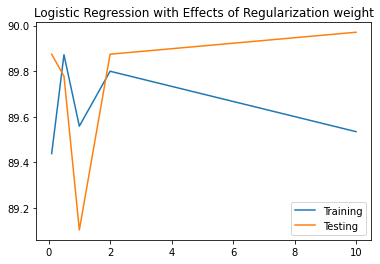

In [111]:
regularization_wts = [0.1,0.5,1,2,10]

# Please insert your code here

training = []
testing = []


for wt in regularization_wts:
    # Step 1 : Create a logistic regression classifier with the given regularization weight (1 point)
    lr = LogisticRegression(C=wt, max_iter=10000)
    # Step 2 : Learn the decision tree using the train set (1 point)
    lr.fit(trainx, trainy)
    # Step 3 : Compute train accuracy in % (0.5 points)
    pred_x = lr.predict(trainx)
    print("Train Accuracy with regularization wt",wt," :", 100*accuracy_score(trainy, pred_x))
    training.append(100*accuracy_score(trainy, pred_x))
    # Step 4 : Compute test accuracy in % (0.5 points)
    pred = lr.predict(testx)
    print("Test Accuracy with regularization wt",wt," :", 100*accuracy_score(testy, pred))  
    testing.append(100*accuracy_score(testy, pred)) 

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(regularization_wts, regularization_wts, training, testing, "Training", "Testing", "Logistic Regression with Effects of Regularization weight")

### Comments on the effect of regularization weights on accuracy (1 point) 

---

Observation:
1. When weights of regularization is low, accuracy of Train Dataset is higher then test,  but as regularization weight increase, Accuracy of Test dataset(Out of Bound or OOB dataset) increases over training dataset.
2. Improvement when not using regularization weights.